# Pandas

## Profs Felipe Meneguzzi e Henry Cagnini

### Agenda:

* Ordenação
* Função map
* Remoção de duplicatas
* Medidas populacionais
* Créditos

## Pandas
### Ordenação

* https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html
* Assim como a biblioteca numpy, pandas também suporta ordenação de linhas/colunas
* A ordenação mantém a integridade das linhas/colunas 

In [1]:
import pandas as pd
import numpy as np
from IPython.display import display

np.random.seed(0)
df = pd.DataFrame(
    data=np.random.random((3, 3)), 
    index=['a', 'b', 'c'], 
    columns=['x', 'y', 'z']
)
display(df)

x         y         z
a  0.548814  0.715189  0.602763
b  0.544883  0.423655  0.645894
c  0.437587  0.891773  0.963663

Ordena as linhas

In [2]:
df.sort_values(by='x', axis='index')

x         y         z
c  0.437587  0.891773  0.963663
b  0.544883  0.423655  0.645894
a  0.548814  0.715189  0.602763

Ordena as colunas

In [3]:
df.sort_values(by='a', axis='columns')

x         z         y
a  0.548814  0.602763  0.715189
b  0.544883  0.645894  0.423655
c  0.437587  0.963663  0.891773

## Pandas
### Função map

* [pandas.DataFrame.apply](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.apply.html#pandas.DataFrame.apply)
* Semelhante a função nativa de Python
* Aplica uma função a cada uma das linhas ou colunas de um DataFrame


In [4]:
import pandas as pd
import numpy as np

dfa = pd.DataFrame(
    data=[
        [35, 'M', 170, 70],
        [32, 'F', 165, 55],
        [28, 'F', 160, 65],
        [30, 'M', 168, 68],
    ],
    index=pd.MultiIndex.from_tuples(
        [('cleiton', 'SP'), ('paola', 'SP'), ('laís', 'SP'), ('rafael', 'RJ')], 
        names=['nome', 'cidade']
    ),
    columns=['idade', 'sexo', 'altura', 'peso'],
)

dfb = pd.DataFrame(
    data=[
        [31, 'F', 172, 51],
        [32, 'F', 165, 55],
    ],
    index=pd.MultiIndex.from_tuples([
        ('paola', 'SM'),('paola', 'SP')], 
        names=['nome', 'cidade']),
    columns=['idade', 'sexo', 'altura', 'peso'],
)

display(dfa)
display(dfb)

idade sexo  altura  peso
nome    cidade                          
cleiton SP         35    M     170    70
paola   SP         32    F     165    55
laís    SP         28    F     160    65
rafael  RJ         30    M     168    68

idade sexo  altura  peso
nome  cidade                          
paola SM         31    F     172    51
      SP         32    F     165    55

In [5]:
def soma_idade(row):
    """
    Adiciona mais 2 anos a idade.
    """
    row['idade'] += 2
    return row

print('antes:')
display(dfa)

antes:


idade sexo  altura  peso
nome    cidade                          
cleiton SP         35    M     170    70
paola   SP         32    F     165    55
laís    SP         28    F     160    65
rafael  RJ         30    M     168    68

In [6]:
print('depois:')
dfa.apply(soma_idade, axis=1)  # aplica a cada uma das linhas. use axis=0 para aplicar a cada uma das colunas

depois:


idade sexo  altura  peso
nome    cidade                          
cleiton SP         37    M     170    70
paola   SP         34    F     165    55
laís    SP         30    F     160    65
rafael  RJ         32    M     168    68

## Pandas
### Remoção de duplicatas

* [pandas.DataFrame.drop_duplicates](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop_duplicates.html)
* Remove as duplicadas nas colunas especificadas
* Pode remover todas as linhas duplicadas, se nenhum conjunto de colunas for dado

In [11]:
import pandas as pd

df = pd.DataFrame(
    [['a', 'a', 'b'],
     ['a', 'a', 'c'],
     ['a', 'a', 'b']],
    columns=['C1', 'C2', 'C3'],
    index=['I1', 'I2', 'I3']
)

df

C1 C2 C3
I1  a  a  b
I2  a  a  c
I3  a  a  b

In [12]:
df.drop_duplicates()

C1 C2 C3
I1  a  a  b
I2  a  a  c

In [13]:
df.drop_duplicates(subset=['C1', 'C2'])

C1 C2 C3
I1  a  a  b

## Pandas
### Medidas populacionais

Assim como o numpy, em pandas é possível extrair medidas populacionais dos atributos do DataFrame:
* Média
* Mediana
* Histograma

In [6]:
import pandas as pd

dfa = pd.DataFrame(
    data=[
        [35, 'M', 170, 70],
        [32, 'F', 165, 55],
        [28, 'F', 160, 65],
        [30, 'M', 168, 68],
    ],
    index=pd.MultiIndex.from_tuples(
        [('cleiton', 'SP'), ('paola', 'SP'), ('laís', 'SP'), ('rafael', 'RJ')], 
        names=['nome', 'cidade']
    ),
    columns=['idade', 'sexo', 'altura', 'peso'],
)

In [7]:
dfa.mean()

idade      31.25
altura    165.75
peso       64.50
dtype: float64

In [8]:
dfa.median()

idade      31.0
altura    166.5
peso       66.5
dtype: float64

In [9]:
dfa['idade'].mean()

31.25

## Pandas
### Medidas populacionais

* [pandas.DataFrame.hist](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.hist.html)
* Utilizado em conjunto com a biblioteca matplotlib
* Permite ver a distribuição dos dados nos atributos

In [10]:
import pandas as pd

dfa = pd.DataFrame(
    data=[
        [35, 'M', 170, 70],
        [32, 'F', 165, 55],
        [28, 'F', 160, 65],
        [30, 'M', 168, 68],
    ],
    index=pd.MultiIndex.from_tuples(
        [('cleiton', 'SP'), ('paola', 'SP'), ('laís', 'SP'), ('rafael', 'RJ')], 
        names=['nome', 'cidade']
    ),
    columns=['idade', 'sexo', 'altura', 'peso'],
)

In [11]:
from matplotlib import pyplot as plt

dfa.hist()
plt.show()

<Figure size 640x480 with 4 Axes>

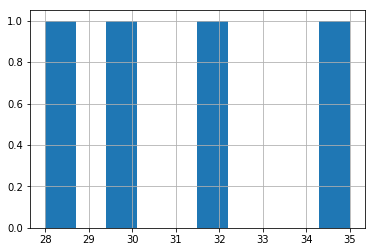

In [12]:
dfa['idade'].hist()
plt.show()

## Leitura recomendada

* Documentação pandas: https://pandas.pydata.org/

## Créditos

* Exercícios adaptados do GitHub: https://github.com/guipsamora/pandas_exercises